In [2]:
import pandas as pd
training_data = pd.read_csv('ml_case_training_data.csv')
hist_data = pd.read_csv('ml_case_training_hist_data.csv')
churn_data = pd.read_csv('ml_case_training_output.csv')
churn_data.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [3]:
print('rows and columns', training_data.shape)
training_data.head(10)

rows and columns (16096, 32)


,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
5,568bb38a1afd7c0fc49c77b3789b59a3,sfisfxfcocfpcmckuekokxuseixdaoeu,NaN,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,...,40.606701,f,1052.37,-3.18,-3.18,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000
6,149d57cf92fc41cf94415803a877cb4b,NaN,NaN,NaN,4425,0,526,2010-01-13,2016-03-07,NaN,...,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800
7,1aa498825382410b098937d65c4ec26d,NaN,NaN,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2011-12-09,...,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200
8,7ab4bf4878d8f7661dfc20e9b8e18011,sscfoipxikopfskekuobeuxkxmwsuucb,NaN,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,NaN,...,44.311378,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
9,01495c955be7ec5e7f3203406785aae0,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,...,40.606701,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400


In [4]:
print('rows and columns of historical data', hist_data.shape)
hist_data.head()

rows and columns of historical data (193002, 8)


,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
df = pd.merge(left=training_data, right=churn_data, how='left',
         left_on='id', right_on='id')
print(df.shape)
df.head()


(16096, 33)


,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [6]:
df.describe().round(2)

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,16096.00,16096.00,16096.00,3508.00,3508.00,3508.00,3508.00,16096.00,16096.00,...,15970.00,15970.00,16096.00,16083.00,16083.00,16096.00,16081.00,16096.00,16093.00,16096.0
mean,NaN,194804.38,31911.64,19461.54,335.84,335.84,3837.44,206.85,2370.56,1907.35,...,0.05,43.53,196.12,22.46,21.46,1.35,217.99,5.03,20.60,0.1
std,NaN,679515.08,177588.46,82356.76,649.41,649.41,5425.74,455.63,4035.09,5257.36,...,0.05,5.21,494.37,23.70,27.92,1.46,366.74,1.68,21.77,0.3
min,NaN,-125276.00,-3037.00,-91386.00,-364.94,-364.94,-2503.48,0.00,-16689.26,-85627.00,...,0.00,-0.12,-9038.21,-525.54,-615.66,1.00,-4148.99,1.00,1.00,0.0
25%,NaN,5906.25,0.00,0.00,0.00,0.00,1158.18,0.00,513.23,0.00,...,0.00,40.61,0.00,11.96,11.95,1.00,51.97,4.00,12.50,0.0
50%,NaN,15332.50,0.00,901.00,162.95,162.95,2187.23,42.22,1179.16,378.00,...,0.09,44.31,44.46,21.09,20.97,1.00,119.68,5.00,13.86,0.0
75%,NaN,50221.50,0.00,4127.00,396.18,396.18,4246.56,228.12,2692.08,1994.25,...,0.10,44.31,218.09,29.64,29.64,1.00,275.81,6.00,19.80,0.0
max,NaN,16097108.00,4188440.00,4538720.00,12566.08,12566.08,81122.63,9682.89,103801.93,175375.00,...,0.20,59.44,15042.79,374.64,374.64,32.00,24570.65,16.00,500.00,1.0


The above statistics show that customers produced electricity and gas; few customers have solar power, but customers can't make gas. So we consider this as a data discrepancy. It also shows the columns with lot of null values. Now we will do the data cleaning.

In [7]:
print(df.columns[df.isna().any()])
missing_values = df.isna().sum()
pd.DataFrame({'Missign Values percentage': ((missing_values/len(df)) * 100).round(2)})


Index(['activity_new', 'campaign_disc_ele', 'channel_sales', 'date_end',
       'date_first_activ', 'date_modif_prod', 'date_renewal',
       'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_discount_energy',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'margin_gross_pow_ele', 'margin_net_pow_ele',
       'net_margin', 'origin_up', 'pow_max'],
      dtype='object')


,Missign Values percentage
id,0.00
activity_new,59.30
campaign_disc_ele,100.00
channel_sales,26.21
cons_12m,0.00
cons_gas_12m,0.00
cons_last_month,0.00
date_activ,0.00
date_end,0.01
date_first_activ,78.21


The above values show that campaign_disc_ele, date_first_activ, forecast_base_bill_ele, forecast_base_bill_year, forecast_bill_12m, forecast_cons are the columns with most null values. Therefore we will drop these columns, and it would help in a better training model.

In [8]:
df.drop(['activity_new', 'campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele',
             'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons'], axis=1, inplace=True)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


                 id  churn
churn_retain              
churn          1595   1595
retain        14501  14501
                id  churn
churn_retain             
churn          9.9    9.9
retain        90.1   90.1


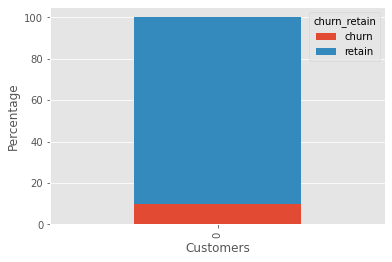

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np
plt.style.use('ggplot')
churn_dict = {0: 'retain', 1 : 'churn'}
churn_data['churn_retain'] = churn_data['churn'].replace(churn_dict)
churn_total = churn_data.groupby('churn_retain').count()
print(churn_total)
churn_percentage = (churn_total/churn_total.sum() * 100).round(1)
churn_percentage.transpose().plot(kind='bar', stacked=True)
print(churn_percentage)
plt.xlabel('Customers')
plt.ylabel('Percentage')
sns.barplot()
plt.show()


Text(0.5, 1.0, 'Year vs Churn')

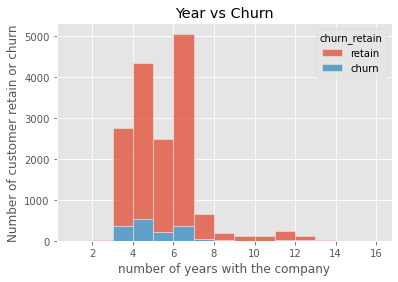

In [10]:
df['churn_retain'] = churn_data['churn'].replace(churn_dict)
sns.histplot(data=df, x='num_years_antig',
             hue='churn_retain', binwidth=1, multiple='stack')
plt.xlabel('number of years with the company')
plt.ylabel('Number of customer retain or churn')
plt.title('Year vs Churn')


Text(0.5, 0, 'channel sales')

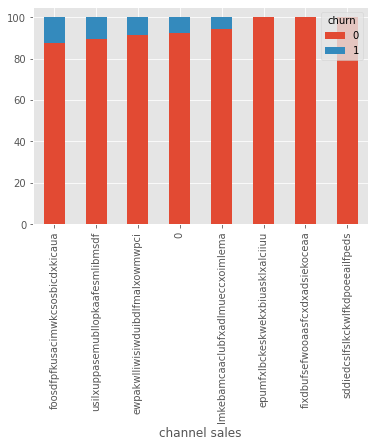

In [11]:
df['channel_sales'] = df['channel_sales'].fillna(0)
channel_df = df[['id', 'channel_sales', 'churn']]
channel_df = channel_df.groupby(['channel_sales', 'churn'])[
    'id'].count().unstack(level=1)
channel_percentage = (channel_df.div(channel_df.sum(
    axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
channel_percentage.plot(kind='bar', stacked=True)
plt.xlabel('channel sales')

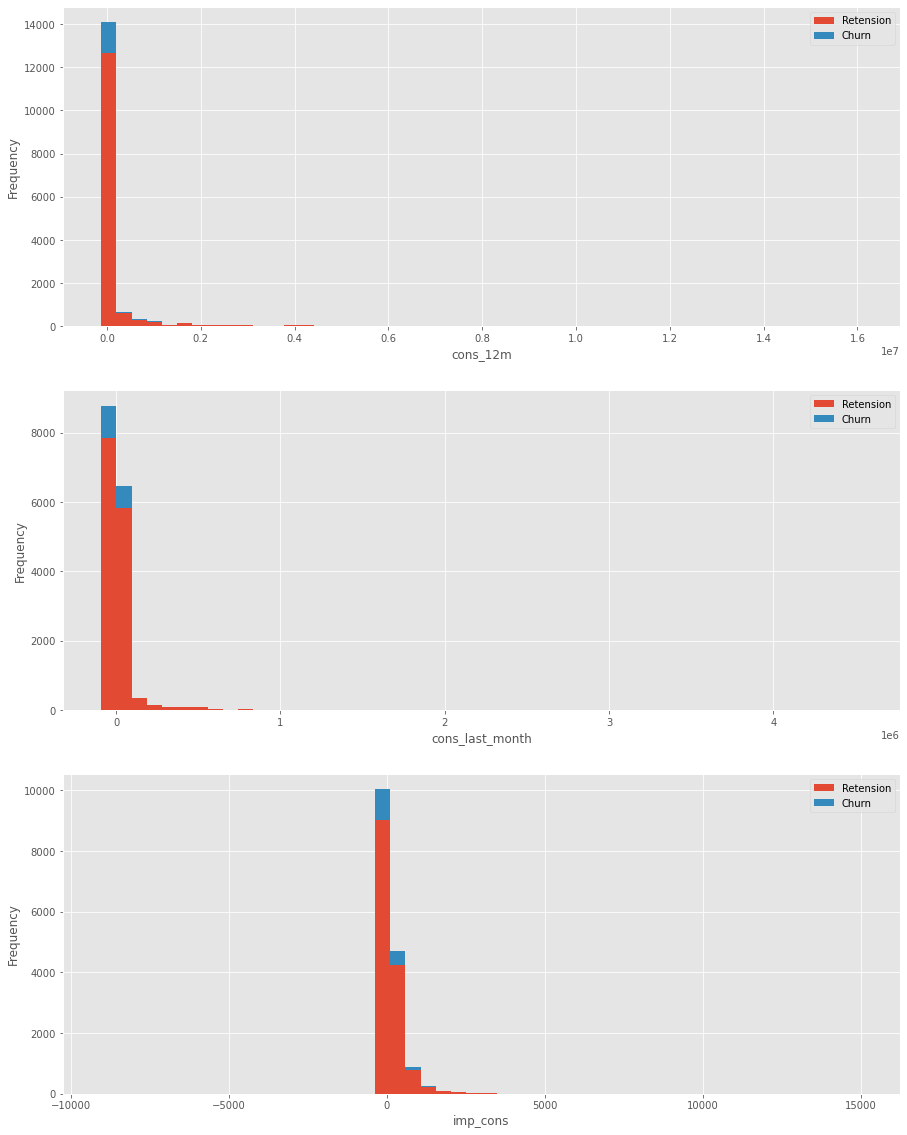

In [21]:
def histo_plot(dataframe, column, ax, bins=50):
    temp = pd.DataFrame(
        {'Retension': dataframe[dataframe['churn'] == 0][column], 'Churn': dataframe[dataframe['churn'] == 1][column]})
    temp[['Retension', 'Churn']].plot(kind='hist', stacked = True, bins = bins, ax = ax)
    ax = ax.set_xlabel(column)
fig, axs = plt.subplots(nrows = 3, figsize = (15, 20))
histo_plot(df, 'cons_12m', axs[0])
histo_plot(df, 'cons_last_month', axs[1])
histo_plot(df, 'imp_cons', axs[2])


(-5000.0, 10000.0)

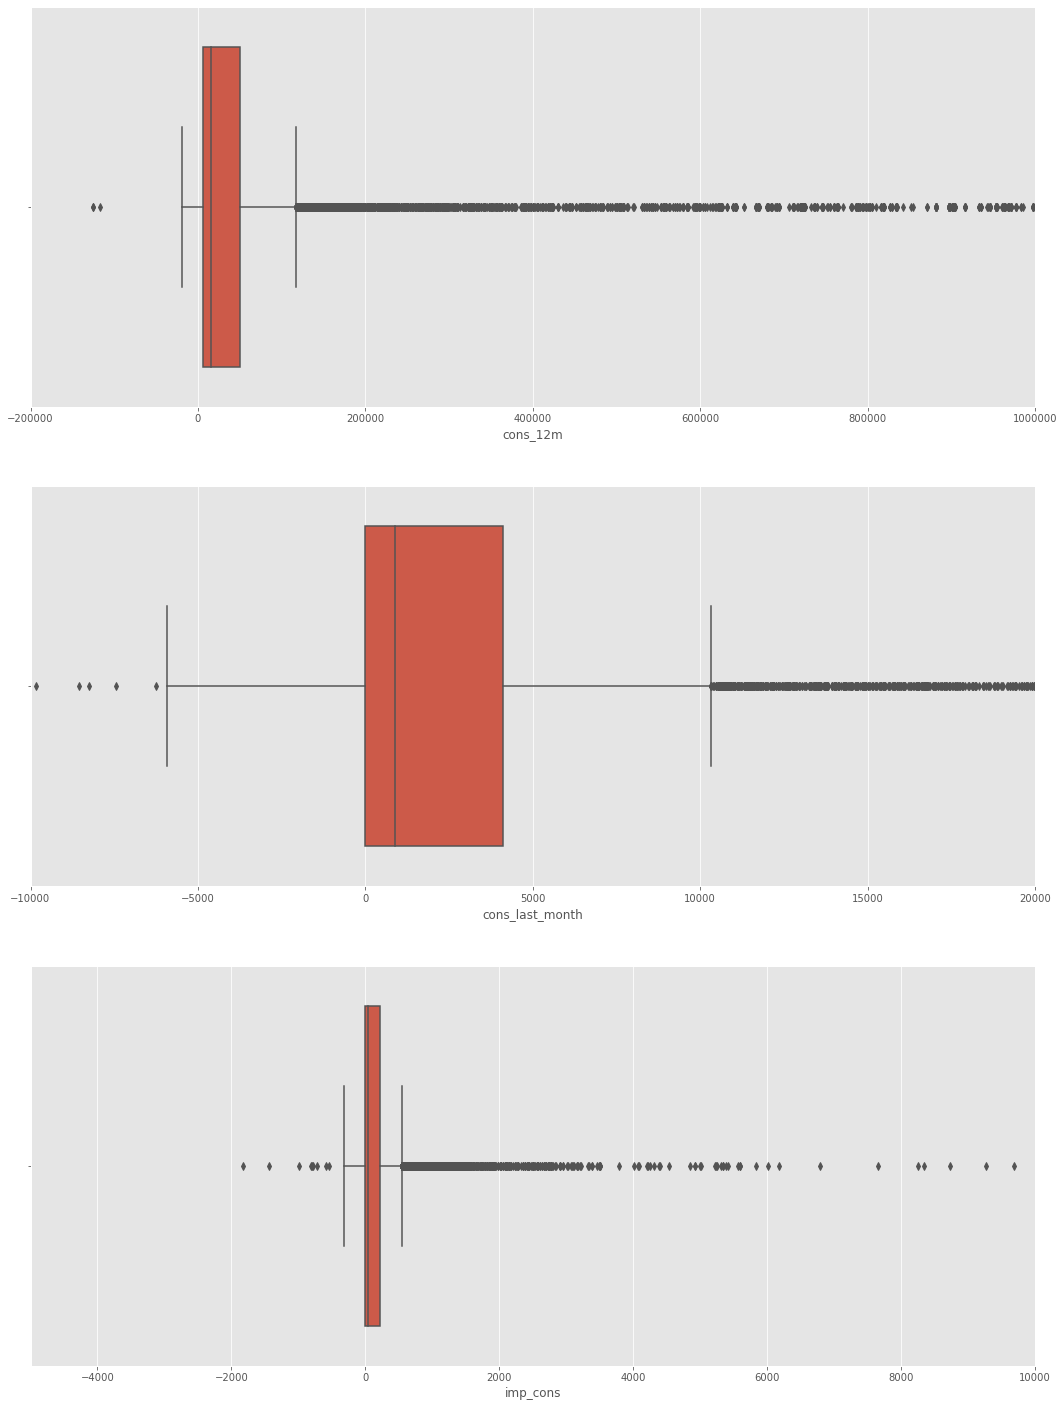

In [58]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 25))
sns.boxplot(data=df, x = 'cons_12m', ax =axs[0], hue='churn')
sns.boxplot(data=df, x='cons_last_month', ax=axs[1])
sns.boxplot(data=df, x='imp_cons', ax=axs[2])

for ax in axs:
    ax.ticklabel_format(style = 'plain', axis = 'x')
axs[0].set_xlim(-200000, 1000000)
axs[1].set_xlim(-10000, 20000)
axs[2].set_xlim(-5000, 10000)


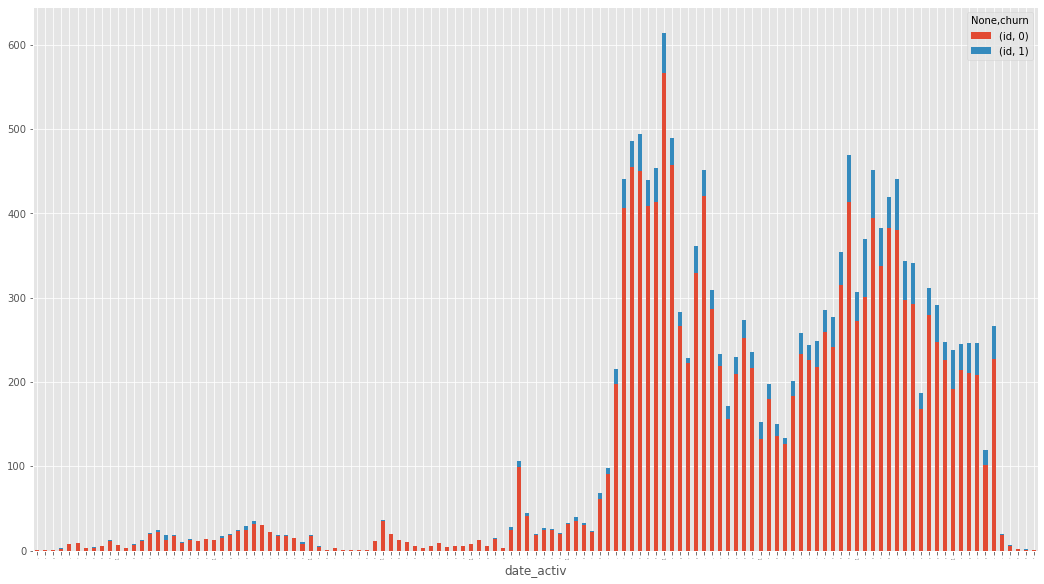

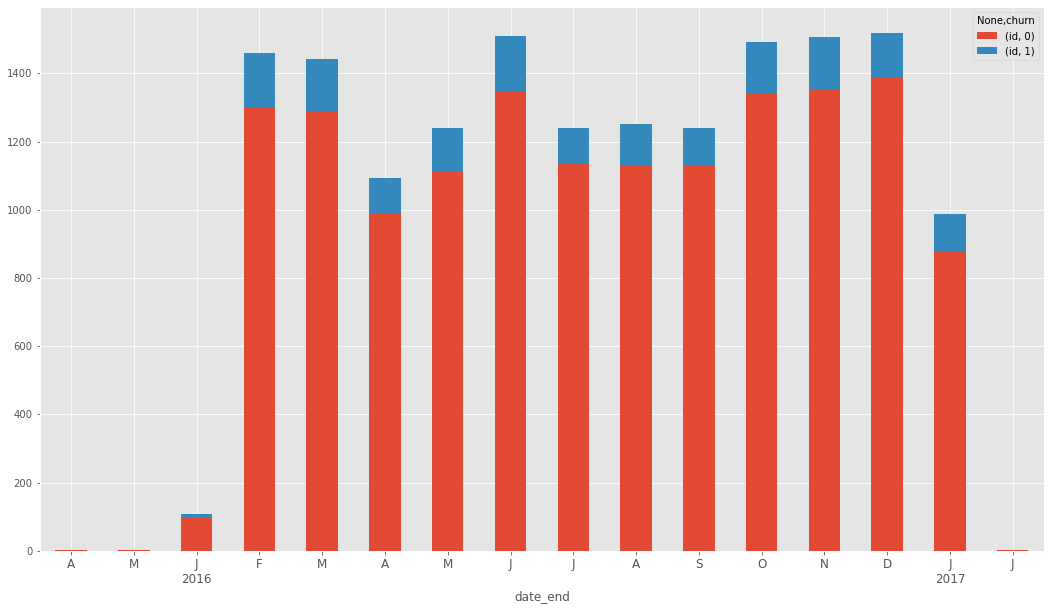

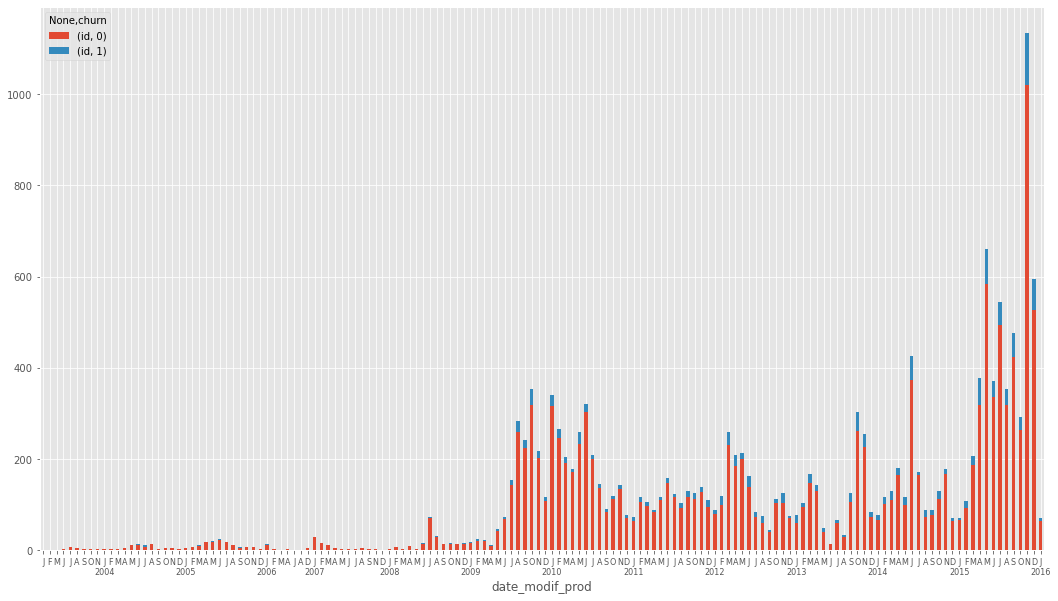

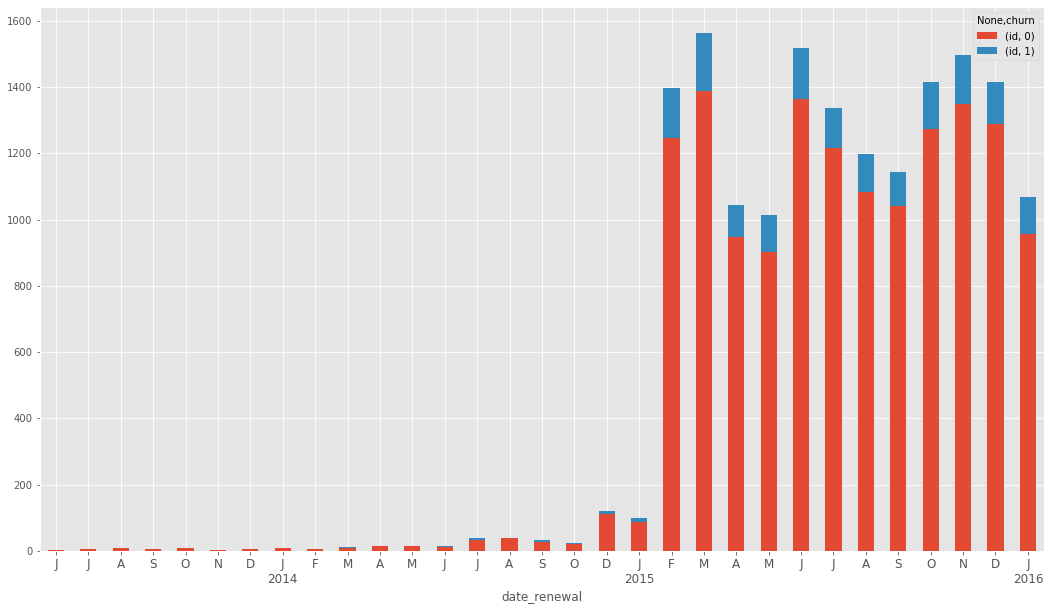

In [76]:
dfdate = df[['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'churn']].copy()
dfdate['date_activ'] = pd.to_datetime(dfdate['date_activ'], format = '%Y-%m-%d')
dfdate['date_end'] = pd.to_datetime(dfdate['date_end'], format='%Y-%m-%d')
dfdate['date_modif_prod'] = pd.to_datetime(
    dfdate['date_modif_prod'], format='%Y-%m-%d')
dfdate['date_renewal'] = pd.to_datetime(
    dfdate['date_renewal'], format='%Y-%m-%d')

def line_format (label):
    month = label.month_name()[:1]
    if label.month_name() == 'January':
        month += f'\n{label.year}'
    return month
def dates_plot(dataframe, column, fontsize = 12):
    temp = dataframe[[column, 'churn', 'id']].set_index(column).groupby([pd.Grouper(freq='M'), 'churn']).count().unstack(level = 1)
    ax = temp.plot(kind = 'bar', stacked = True, figsize = (18, 10), rot = 0)
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    plt.xticks(fontsize = fontsize)
    plt.show()

dates_plot(dfdate, 'date_activ', fontsize=2)
dates_plot(dfdate, 'date_end', fontsize=12)
dates_plot(dfdate, 'date_modif_prod', fontsize=8)
dates_plot(dfdate, 'date_renewal', fontsize=12)
